## Project Description

Hundreds of free advertisements for vehicles are published on the company’s site every day. Being an analyst at Crankshaft List requires studying the data over the last few years and determine which factors influence the price of a vehicle


**Task: Find factors that influence the price of a vehicle**


### Description of the data

The dataset contains the following fields:
1. price
2. model_year
3. model
4. condition
5. cylinders
6. fuel — gas, diesel, etc.
7. odometer — the vehicle's mileage when the ad was published
8. transmission
9. paint_color
10. is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
11. date_posted — the date the ad was published
12. days_listed — from publication to removal

In [1]:
# importing libarraies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use('seaborn')

In [2]:
# plt.style.available

In [3]:
# reading data

vehicle = pd.read_csv('vehicles_us.csv', na_values = ' ')
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
vehicle.shape

(51525, 13)

In [5]:
#General Information

vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
#Descritive statistics 

vehicle.describe(include = 'all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


### Data preprocessing 

In [7]:
#checking missing values 

vehicle.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
# dropping is_4wd col

vehicle.drop('is_4wd', axis = 1, inplace = True)


> - is_4wd column is dropped as it has about 50% of missign values. 

In [9]:
# replacing missing values in model_year with 0

vehicle.model_year.fillna(0,inplace = True)


In [10]:
#Replacing missing values in cylinders

vehicle.cylinders.value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

> - since taking the mode might skew the results, missing values can be inferred from column model transmission and type. Missing values in this case is missing at random 

In [11]:
vehicle['cyl'] = vehicle.groupby(['model','fuel','transmission','type']).cylinders.transform('median')

mask = vehicle[vehicle.cylinders.isnull()].index.to_list()

vehicle.loc[mask,'cylinders'] = vehicle.cyl

In [12]:
vehicle[vehicle.cylinders.isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,cyl
2321,1700,1991.0,toyota corolla,good,NaN,gas,209000.0,manual,hatchback,NaN,2019-03-03,14,NaN
2432,7900,2011.0,toyota prius,good,NaN,electric,78466.0,automatic,sedan,NaN,2018-09-13,34,NaN
6892,21000,2015.0,jeep grand cherokee,like new,NaN,gas,75000.0,automatic,hatchback,grey,2018-10-05,12,NaN
7933,1850,1991.0,jeep wrangler,good,NaN,gas,137000.0,other,offroad,red,2019-02-25,22,NaN
8874,5500,2012.0,nissan altima,excellent,NaN,diesel,127000.0,automatic,coupe,white,2018-07-19,53,NaN


> - For some model, no information about the cylinder is present to replace with median. So these values can be replaced with 0 

In [13]:
vehicle.cylinders.fillna(0,inplace = True)

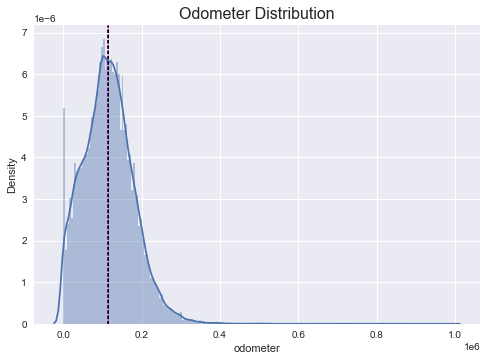

In [14]:
#Replacing missing values in odometer

#check distribution 
sns.distplot(vehicle.odometer, bins='fd')
plt.axvline(vehicle.odometer.mean(), color='black', linestyle='dashed', linewidth=1)
plt.axvline(vehicle.odometer.median(), color='purple', linestyle='dashed', linewidth=1)
plt.title('Odometer Distribution', fontsize=16)
plt.show()

> - Since the distribution is normal, the missing values can be replaced with the mean value. However, since there are too many missing values, filling every missing value with mean might skew the result
> - So the missing values is replaced with 0

In [15]:
# Reaplace missing values in odometer

vehicle.odometer.fillna(0, inplace = True)

In [16]:
#missing values in paint 

vehicle.paint_color.value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

> - Some of the models have missing values in paint_color. The missing values in this column can be replaced with 'UNKNOWN' instead of imputation

In [17]:
vehicle.paint_color.fillna('unknown', inplace = True)

In [18]:
# cars and their respective colors 

# paint = vehicle[~vehicle.paint_color.isnull()].groupby('model').paint_color.unique().to_frame().reset_index()

# paint.head()

In [19]:
# random.choice(list(paint[paint.model == 'bmw x5'].paint_color[1]))

In [20]:
# model_paint = {}
# models = list(vehicle[vehicle.paint_color.isnull()].model.unique())#.to_list()

# for mod in models:
#     color = random.choice(list(paint[paint.model == mod].paint_color[1]))

In [21]:
vehicle.isnull().sum()

price            0
model_year       0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
date_posted      0
days_listed      0
cyl             35
dtype: int64

In [22]:
#changing datatypes

vehicle.model_year = vehicle.model_year.astype('int')

vehicle.cylinders = vehicle.cylinders.astype('int')

vehicle.date_posted = pd.to_datetime(vehicle.date_posted)

> - Some columns datatypes can be changed from float to int to save memory, and the date_posted column's data type must be datetime 

In [23]:
# removing unwanted columns

vehicle.drop('cyl', axis=1, inplace = True)

### Feature Engineering

In [24]:
# adding week, month and year the ad was placed

vehicle['month'] = vehicle.date_posted.dt.month

vehicle['week'] = vehicle.date_posted.dt.isocalendar().week

vehicle['year'] = vehicle.date_posted.dt.year

vehicle.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,month,week,year
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,2018-06-23,19,6,25,2018
1,25500,0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,2018-10-19,50,10,42,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,2019-02-07,79,2,6,2019


> - Extracting month, week and year from the date_posted column for further analysis

In [25]:
# Adding vehicle age column 

vehicle['age'] = vehicle.loc[vehicle.model_year != 0, 'year'] - vehicle.loc[~vehicle.model_year != 0, 'model_year']
vehicle.age.fillna(0, inplace = True)
vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,month,week,year,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,2018-06-23,19,6,25,2018,7.0
1,25500,0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,2018-10-19,50,10,42,2018,0.0
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,2019-02-07,79,2,6,2019,6.0
3,1500,2003,ford f-150,fair,8,gas,0.0,automatic,pickup,unknown,2019-03-22,9,3,12,2019,16.0
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,2019-04-02,28,4,14,2019,2.0


> - Calculating the age of the vehicle using its model year and the year posted

In [26]:
# relace string values in condition to numeric scale 

string_values = {'new':5,
                'like new':4,
                'excellent':3,
                'good':2,
                'fair':1,
                'salvage':0}


vehicle['condition_scale'] = vehicle.condition.apply(lambda x: string_values[x])

In [27]:
vehicle.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,month,week,year,age,condition_scale
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,2018-06-23,19,6,25,2018,7.0,2
1,25500,0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,2018-10-19,50,10,42,2018,0.0,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,2019-02-07,79,2,6,2019,6.0,4


### Exploratory Data Analysis

**1. Study the following parameters: price, vehicle's age when the ad was placed, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.**

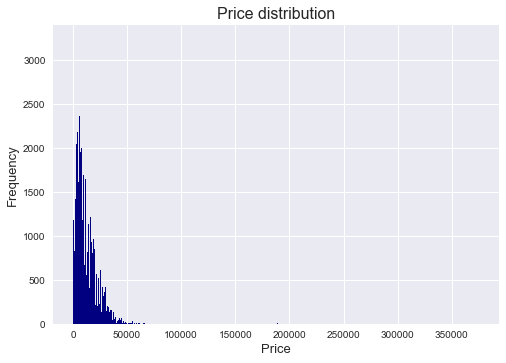

In [28]:
#distribution of price

#with outliers
plt.hist(vehicle.price, bins = 'fd', color = 'navy')
plt.title('Price distribution', fontsize=16)
plt.xlabel('Price',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()


# print(' ')


# #without outliers
# plt.hist(vehicle.price, bins = 'fd', color = 'navy', edgecolor = 'white')
# plt.title('Price distribution without outliers', fontsize=16)
# plt.xlabel('Price',fontsize=13)
# plt.ylabel('Frequency',fontsize=13)
# plt.xlim(0,70000)
# plt.show()


> - In the first plot, the plot seems to be cluttered due to the presence of an outlier, whereas in the second plot, the outlier is removed by seting the xlim range. This improves readability considerably
> - The number of bins is specified as fd which uses freedman-Diaconis rule for optimal number of bins selecttion 

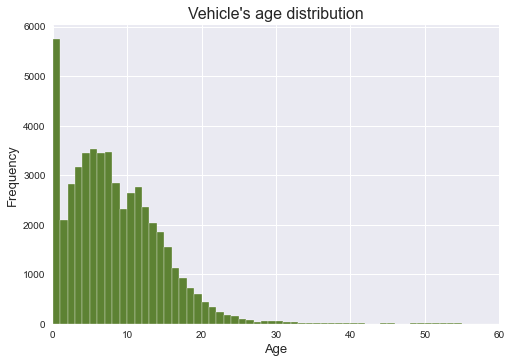

In [29]:
# ditribution of vehicle's age 

plt.hist(vehicle.age,bins= 110, color = '#5D8233', edgecolor= 'white')
plt.title("Vehicle's age distribution", fontsize = 16)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.xlim(0,60)
plt.show()

# plt.hist(vehicle.age,bins= 110, color = '#5D8233', edgecolor= 'white')
# plt.title("Vehicle's age distribution Without outliers", fontsize = 16)
# plt.xlabel('Age', fontsize=13)
# plt.ylabel('Frequency',fontsize=13)
# plt.xlim(1,33)
# plt.show()

> - The outlier in this case is the value 0 with extremely large count and the vehicles whose age is > 35 with very less count 

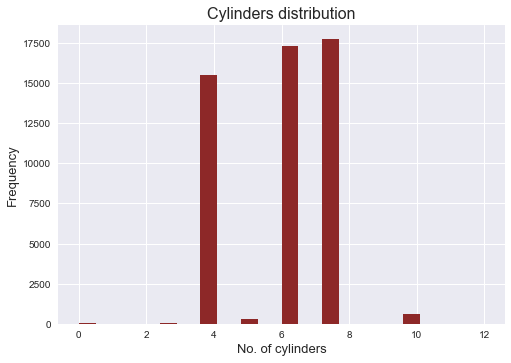

In [30]:
# distribution of number of cylinders

plt.hist(vehicle.cylinders,width = 0.5 ,color = '#8D2828')
plt.title('Cylinders distribution',fontsize=16)
plt.xlabel('No. of cylinders',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

> - The vehicles with cylinders 3,7 and 12 are too less compared to the other cylinders

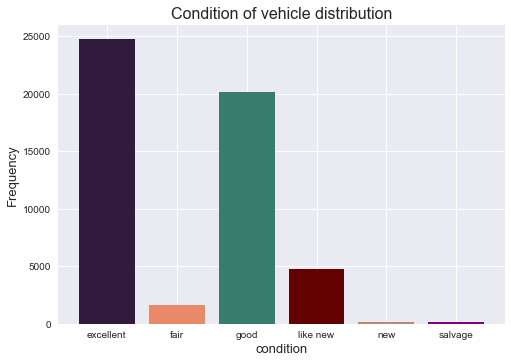

In [31]:
# Distribution of condition

condition = vehicle.groupby('condition').condition.count().to_frame()

plt.bar(condition.index, condition.condition, color = ['#301B3F','#E9896A','#387C6D','#630000','#B68973','purple'])
plt.title('Condition of vehicle distribution', fontsize=16)
plt.xlabel('condition',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

> - Most of the vehciles sold are either in excellent, good condition or like new. Those vehicles that are just fair are sold less while those that are new and salvage are sold the least

**2. Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.**

In [32]:
#Price
p_q1 = vehicle.price.quantile(0.25)
p_q3 = vehicle.price.quantile(0.75)
p_iqr = p_q3 - p_q1
p_upper = p_q3 + 1.5 * p_iqr
p_lower = p_q1 - 1.5 * p_iqr


#age
a_q1 = vehicle.age.quantile(0.25)
a_q3 = vehicle.age.quantile(0.75)
a_iqr = a_q3 - a_q1
a_upper = a_q3 + 1.5 * a_iqr
a_lower = a_q1 - 1.5 * a_iqr

In [33]:
price_outliers = vehicle[(vehicle.price >p_upper) | (vehicle.price <p_lower)].index.to_list()
age_outliers = vehicle[(vehicle.age >a_upper) | (vehicle.age <a_lower)].index.to_list()

In [34]:
len(age_outliers)

638

In [35]:
len(price_outliers)

1646

In [36]:
outliers = price_outliers + age_outliers

len(outliers)

2284

In [37]:
vehicles = vehicle[~vehicle.index.isin(outliers) ].copy()
vehicles.shape

(49274, 17)

> - The outliers in the price and age column were identified and the dataset was filtered accorrdingly

**3. Use the filetered data to plot the histograms and compare with the previos plots**

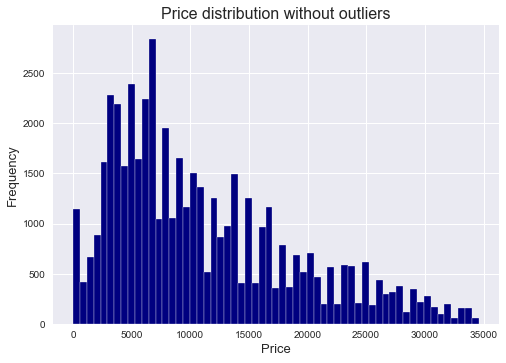

In [38]:
#Price distribution without outliers
plt.hist(vehicles.price, bins = 'fd', color = 'navy', edgecolor = 'white')
plt.title('Price distribution without outliers', fontsize=16)
plt.xlabel('Price',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

In [39]:
vehicle[vehicle.price > 35000].condition.value_counts()

excellent    736
like new     391
good         240
new           46
fair           1
Name: condition, dtype: int64

> - Any price that is above 36000 is considered to be outliers
> - The vehicles that were posted for more price were those which are mostly in excellent condition

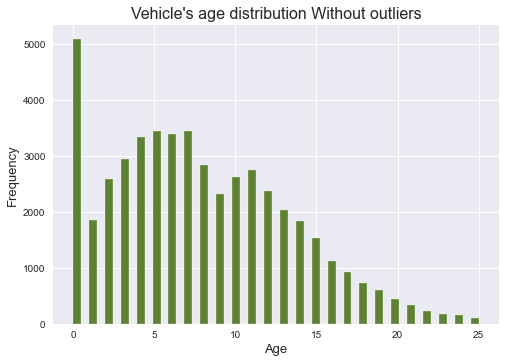

In [40]:
# age distribution without outliers
plt.hist(vehicles.age,bins='fd', color = '#5D8233', edgecolor= 'white')
plt.title("Vehicle's age distribution Without outliers", fontsize = 16)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

> - There were not many vehicle which were more than 25 years old 

**3. Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median**

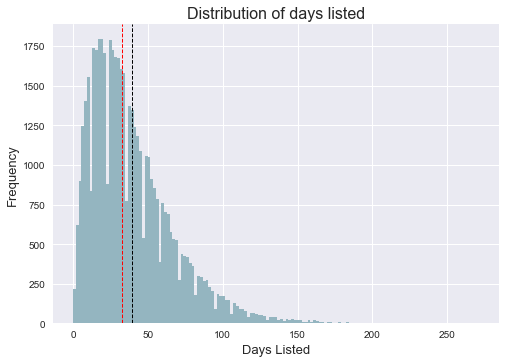

In [41]:
# distribution of ads displayed 

plt.hist(vehicles.days_listed, bins = 'fd', color = '#94B5C0')
plt.title('Distribution of days listed', fontsize=16)
plt.xlabel('Days Listed',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.axvline(vehicles.days_listed.mean(), color='black', linestyle='dashed', linewidth=1)
plt.axvline(vehicles.days_listed.median(), color='red', linestyle='dashed', linewidth=1)
plt.show()


In [42]:
print('Typical lifetime of ads displayed is {}'.format(vehicles.days_listed.median()))

Typical lifetime of ads displayed is 33.0


> - Since the distribution of days listed is right skewed, median is considered to be an appropriate measure for central tendency

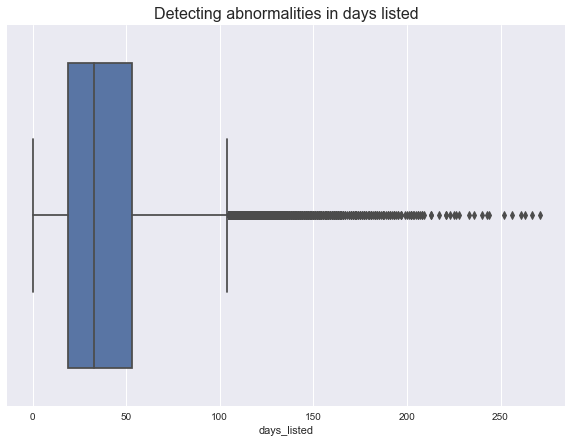

In [43]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
# plt.boxplot(vehicles.days_listed, )
# plt.ylabel('days_listed',fontsize=13)
# plt.title('Days_listed Box plot', fontsize=16)
# # show plot
# plt.show()

sns.boxplot(x =vehicles.days_listed)
plt.title('Detecting abnormalities in days listed', fontsize=16)
plt.show()

In [44]:
# finding outliers 

# finding the 1st quartile
q1 = np.quantile(vehicles.days_listed, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(vehicles.days_listed, 0.75)
med = np.median(vehicles.days_listed)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

34.0 104.0 -32.0


In [45]:
quick = vehicles[(vehicles.days_listed < lower_bound)]
late = vehicles[(vehicles.days_listed > upper_bound)]

In [46]:
quick

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,month,week,year,age,condition_scale


> - There are no ads that has been removed quickly 

In [47]:
late.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,month,week,year,age,condition_scale
15,17990,2013,ram 1500,excellent,8,gas,0.0,automatic,pickup,red,2018-05-15,111,5,20,2018,5.0,3
34,9500,2008,toyota highlander,good,6,gas,149799.0,automatic,SUV,unknown,2018-06-04,121,6,23,2018,10.0,2
51,3800,2012,ford focus,good,4,gas,130323.0,automatic,sedan,black,2018-11-29,261,11,48,2018,6.0,2
89,18800,2015,chevrolet camaro lt coupe 2d,good,6,gas,33926.0,other,coupe,grey,2019-01-16,152,1,3,2019,4.0,2
104,22900,2014,ford f150 supercrew cab xlt,good,6,gas,73711.0,automatic,pickup,white,2019-02-27,141,2,9,2019,5.0,2


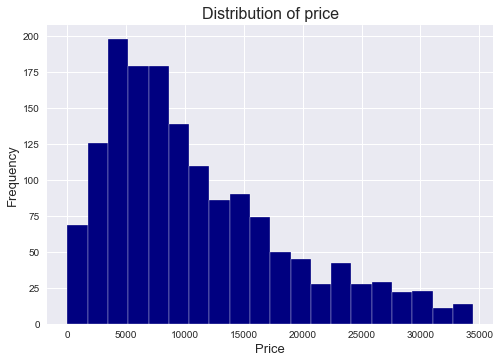

In [48]:
plt.hist(late.price, bins='fd', color ='navy',edgecolor='white')
plt.title('Distribution of price', fontsize=16)
plt.xlabel('Price',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

> - There were more number of vehicles listed for a long time whose price range lies between 4000 to 8000

In [49]:
late.model.value_counts()

chevrolet silverado 1500      68
ford f-150                    68
ram 1500                      53
chevrolet silverado           39
jeep wrangler                 36
                              ..
nissan frontier                5
nissan maxima                  5
hyundai santa fe               4
jeep grand cherokee laredo     3
dodge dakota                   2
Name: model, Length: 99, dtype: int64

> - The reason for the ads lasting for long could be due to the low demand of a particular car model. In our case, example could be ford or chevrolet

In [50]:
late.condition.value_counts(normalize = True)

excellent    0.497406
good         0.396239
like new     0.077821
fair         0.025292
salvage      0.002594
new          0.000649
Name: condition, dtype: float64

> - The vehicles that are in excellent / good condition are mostly stayed up for a long time
> - The reason could be due to disagreement between the buyer and the seller on various other factors like price

In [51]:
late.type.value_counts(normalize=True)

SUV            0.258755
sedan          0.245136
truck          0.212711
pickup         0.118029
coupe          0.044747
wagon          0.039559
mini-van       0.031128
hatchback      0.019455
van            0.016213
convertible    0.005837
offroad        0.005188
other          0.003243
Name: type, dtype: float64

> - Larger vehicels seemed to stay posted for long compared to the smaller vehicles 

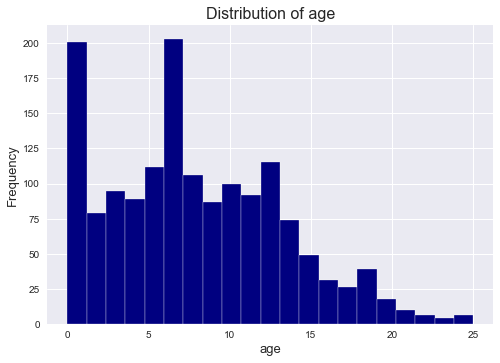

In [52]:
plt.hist(late.age, bins = 'fd', color ='navy', edgecolor='white')
# plt.xlim(1,70)
plt.title('Distribution of age', fontsize=16)
plt.xlabel('age',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

> - Vehcile whose age was not mentioned was listed for a long time along with those vehicles whose age is 6

In [53]:
late[late.age == 6].type.value_counts()

sedan          32
SUV            24
truck          17
pickup         10
wagon           7
hatchback       2
coupe           2
mini-van        1
van             1
convertible     1
Name: type, dtype: int64

> - Heavy weight vehicles normally remain posted for a long time. This explains why vehicles which are 6 years old reamin posted for long 

**3. Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.**

In [54]:
df = vehicles.groupby('type').agg({'date_posted':'count','price':'mean'}).sort_values('date_posted',ascending = False)
df

,date_posted,price
type,,
sedan,12116,6943.974084
SUV,12039,10383.641582
truck,11441,14914.862162
pickup,6515,14756.620875
coupe,2060,13365.068932
wagon,1529,8888.711576
mini-van,1157,8004.687986
hatchback,1022,6806.649706
van,587,8784.521295


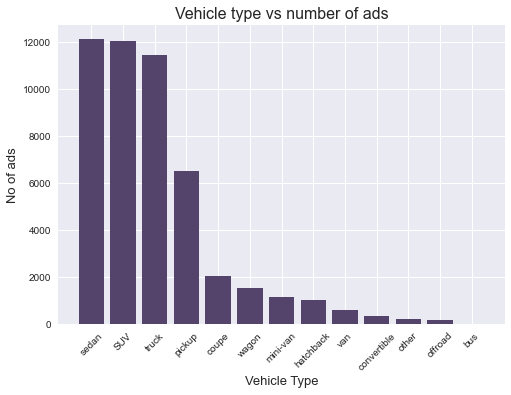

In [55]:
plt.bar(df.index, df.date_posted, color = '#54436B')
plt.xticks(rotation = 45)
plt.title('Vehicle type vs number of ads', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=13)
plt.ylabel('No of ads', fontsize=13)
plt.show()

> - The number of ads posted for the larger vehicles are greater than that of smaller vehicles 
> - Since these vehicles are already there in long listing list, it can be assumed that the vehicles were not sold which resulted in repeated posting of ads for the same vehicles 
> - Another reaosn could be that the site is specifically used for selling large vehicles. Large vehicles are popular on the site and its ads count is very much greater than that of smaller vehicles

**4. What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.**

In [56]:
suv = vehicles[vehicles.type=='SUV']
truck = vehicles[vehicles.type=='truck']
sedan = vehicles[vehicles.type=='sedan']

In [57]:
print('-----------SUV--------------------')
#Finding correlation between the price and on age, mileage, condition, transmission type, and color of SUVs
print('Correlation between the price and on age: ',suv.price.corr(suv.age))
# print('Correlation between the price and on mileage: ',adtype1['price'].corr(adtype1['mileage']))
print('Correlation between the price and on condition: ',suv.price.corr(suv.condition_scale))


print('-----------Truck-----------------')
# #Finding correlation between the price and on age, mileage, condition, transmission type, and color of SUVs
print('Correlation between the price and on age: ',truck.price.corr(truck.age))
# print('Correlation between the price and on mileage: ',adtype2['price'].corr(adtype2['mileage']))
print('Correlation between the price and on condition: ',truck.price.corr(truck.condition_scale))



print('-----------sedan-----------------')
# #Finding correlation between the price and on age, mileage, condition, transmission type, and color of SUVs
print('Correlation between the price and on age: ',sedan.price.corr(sedan.age))
# print('Correlation between the price and on mileage: ',adtype2['price'].corr(adtype2['mileage']))
print('Correlation between the price and on condition: ',sedan.price.corr(sedan.condition_scale))

# value_list2 = ['orange','purple','yellow']
# boolean_series2 = ~(adtype2.paint_color.isin(value_list2))
# truck_df = adtype2[boolean_series2]

-----------SUV--------------------
Correlation between the price and on age:  -0.5238514522748883
Correlation between the price and on condition:  0.2696899746594271
-----------Truck-----------------
Correlation between the price and on age:  -0.5527110904194136
Correlation between the price and on condition:  0.28836992709372483
-----------sedan-----------------
Correlation between the price and on age:  -0.5606377620097339
Correlation between the price and on condition:  0.2980151995360723


> - Calculating correlation reveals that there is modest negative correlation between price and age for each one of the popular types
> - There is also weak correlation between price and condition

**Plots for SUV vehicle type**

In [58]:
# # plotting the realtions 

# sns.jointplot(data=suv, x="age", y="price")
# # plt.title('SUV - age vs price', fontsize=22)
# plt.show()

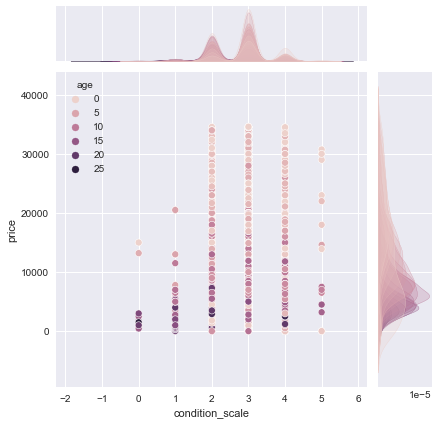

In [59]:
# Price vs condition scale
sns.jointplot(data=suv, x="condition_scale", y="price" ,hue = 'age')
plt.show()

> - SUVs that are in good, excellent or like new are sold for higher price, but the same vehicles are sold for lower price as it gets older
> - low age, good condition of the vehicle are two factors that influence price

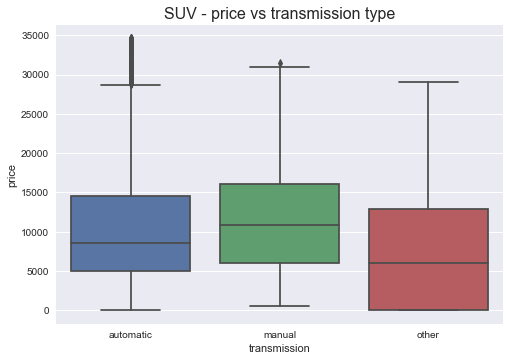

In [60]:
# price vs transmission type

sns.boxplot(x = suv.transmission, y = suv.price)
plt.title('SUV - price vs transmission type', fontsize=16)
plt.show()

> - SUVs with manual transmission are priced more, followed by automatic transmission and at last other types of transmission

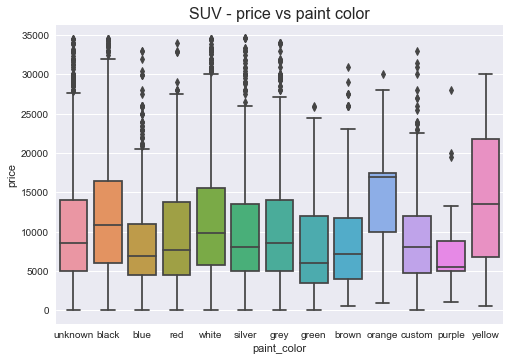

In [61]:
# price vs paint_color 

sns.boxplot(x = suv.paint_color, y = suv.price)
plt.title('SUV - price vs paint color', fontsize=16)
plt.show()

- SUV’s with orange color seems to be in demand and purple with least demand

**Plots for truck vehicle type**

In [62]:
# sns.jointplot(data=truck, x="age", y="price" )
# # plt.title('SUV - age vs price', fontsize=22)
# plt.show()

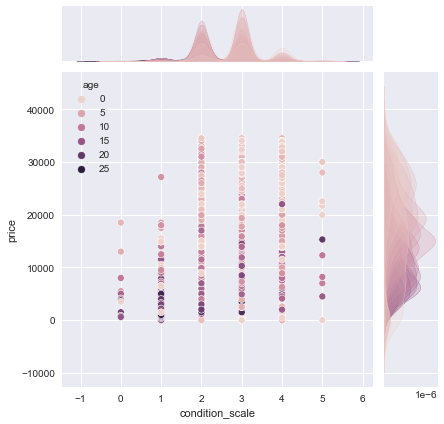

In [63]:
# Price vs condition scale
sns.jointplot(data=truck, x="condition_scale", y="price" ,hue = 'age')
plt.show()

> - Like SUVs, truck also sells for lesser price if the vehicle's age is more and vice versa

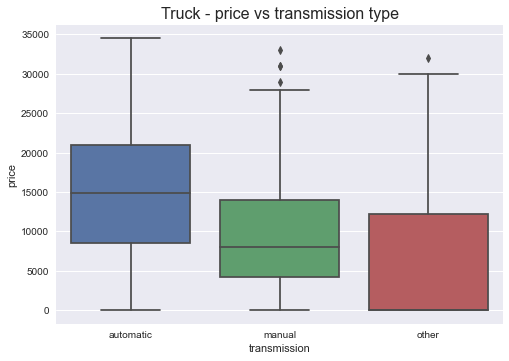

In [64]:
# price vs transmission type

sns.boxplot(x = truck.transmission, y = truck.price)
plt.title('Truck - price vs transmission type', fontsize=16)
plt.show()

> - Unlike SUV, truck with automatic transmissiong type is priced more than the manual transmission type

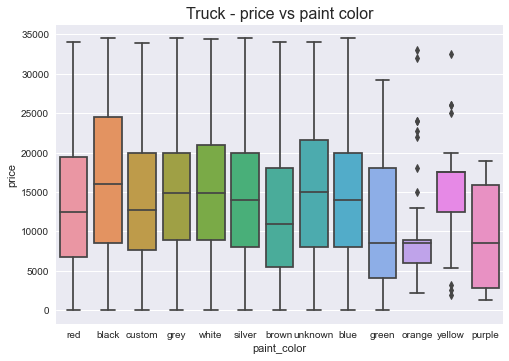

In [65]:
# price vs paint_color 

sns.boxplot(x = truck.paint_color, y = truck.price)
plt.title('Truck - price vs paint color', fontsize=16)
plt.show()

- Trucks in yellow color seems to be more in demand and orange has the least demand


**Plots for sedan**

In [66]:
# sns.jointplot(data=sedan, x="age", y="price" ,)
# # plt.title('SUV - age vs price', fontsize=22)
# plt.show()

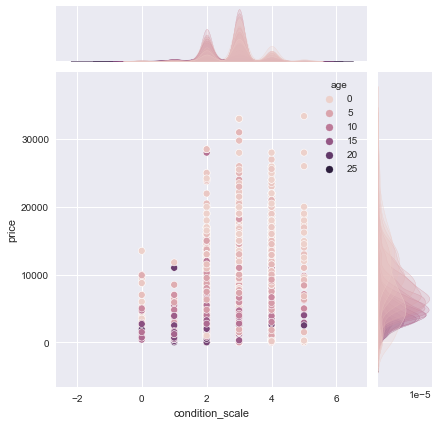

In [67]:
# Price vs condition scale
sns.jointplot(data=sedan, x="condition_scale", y="price" ,hue = 'age')
plt.show()

> - Age and condition affect price in similar way as it was for SUV and trucks

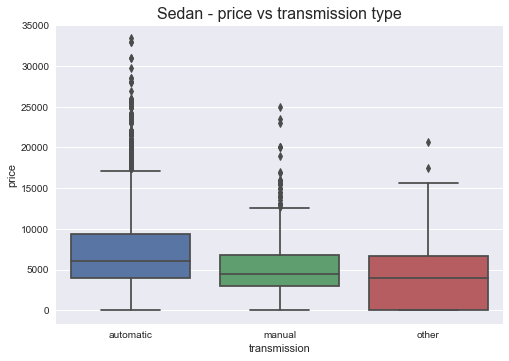

In [68]:
# price vs transmission type

sns.boxplot(x = sedan.transmission, y = sedan.price)
plt.title('Sedan - price vs transmission type', fontsize=16)
plt.show()

> - In case of sedan, automatic transmisison is sold for more price than the one with manual transmission

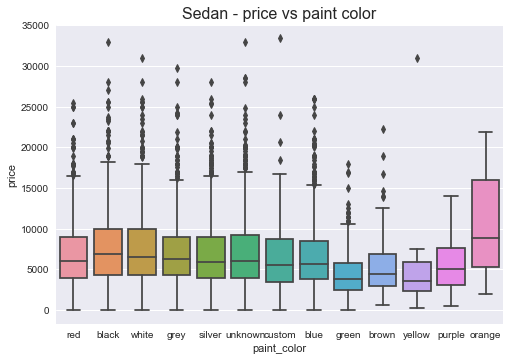

In [69]:
# price vs paint_color 

sns.boxplot(x = sedan.paint_color, y = sedan.price)
plt.title('Sedan - price vs paint color', fontsize=16)
plt.show()

- Sedan’s in orange color is more preferred and expensive while sedan's in yellow is priced less


### Conclusion

- Columns with missing values were found and dropped or filled 
- Datatypes of some columns were changed to suit the analysis
- Month, week and year columns were extracted from date_posted column
- Vehicle’s age column was added with the help of model_year column and year column 
- A new column to hold the numeric values of the string values in condition was added
- Histogram was plotted for some of the numeric columns and bar plot for the categorical ones to study the distribution in detail
- Outlier was calculated for some of the numeric columns using interquartile range and the dataset was filtered to remove outliers
- Outliers for the number of days ad was displayed was calculated. There were no ads that was removed quickly, but there were many ads that was posted for a long period of time. Reasons could be because of the dissatisfaction of the seller in factors like price, low demand for a particular type or model
- The number of ads posted for large vehicles like sedan, SUV and trucks were more compared to others

**Factors that influence price of a vehicle:**
- Age is one important factor that influence price. The greater the age of the vehicle , the lesser is its price
- Second factor that influence price is condition. Vehicles that are in good, excellent or like new are sold more and are priced more. However, even if the vehicle is in this condiiton, if the age is more, the price is sell.
- The other factors like transmision type and paint_color also influences price but it is specific to vehicle types and cannot be generalised